In [68]:
from datetime import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# tickers = yf.Tickers('SYM GXO AUTO.OL KARN.SW ZBRA KGX.DE ABBN.SW CGNX 6383.T MANH')
# tickers = yf.Tickers('GF.SW AWK ECL VLTO BMI XYL') # Tickers of Giacomo
# tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL NEE IBE.MC FSLR ENPH VWS.CO SGRE.MC BEP ORSTED.CO BKW.SW ENR')
# tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VEOEY CWST SRCL CWY.AX TMRAY SYM GXO AUTO.OL ZBRA KGX.DE CGNX DAIUF MANH BKW.SW ENLAY NEE IBDRY DNNGY FSLR ENR.DE')
tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VIE.PA CWST CWY.AX TOM.OL SYM GXO AUTO.OL ZBRA KGX.DE CGNX MANH BKW.SW ENEL.MI NEE IBE.MC ORSTED.CO FSLR ENR.DE')

In [70]:
# df = tickers.download(period="1y")
df = tickers.download(start="2010-01-01", end="2025-01-01", interval="1d")

[*********************100%***********************]  26 of 26 completed


In [71]:
# Save the dataframe to CSV with the timestamp included
filename = f'data/ticker_download_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df.to_csv(filename, index=False)

In [72]:
# Initialize list to store company data
company_data = []

# Loop through each ticker
for ticker in tickers.symbols:

    # Print ticker for debugging
    print(f"Processing {ticker}...")

    # Get ticker object
    t = yf.Ticker(ticker)
    
    # Get info and historical data
    try:
        info = t.info
        # print(f"Sucessful fetching info for {ticker}: {info}")
    except Exception as e:
        print(f"Error fetching info for {ticker}: {e}")
        continue
    
    # hist = t.history(period="2y")
    hist = t.history(start = '2010-01-01', end = '2025-01-01')

    # Calculate required metrics
    company_name = info.get('shortName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')
    market_cap = round(info.get('marketCap', 0) / 1e9, 2) if info.get('marketCap') else 'N/A'  # In billion USD
    volume = round(hist['Volume'].mean() / 1e6, 2) if 'Volume' in hist else 'N/A'  # In million shares
    start_of_period = hist.loc[hist.index[0], 'Close'] if not hist.empty else 'N/A'
    end_of_period = hist.loc[hist.index[-1], 'Close'] if not hist.empty else 'N/A'
    
    # Calculate deltas
    delta_this_year = ((end_of_period - start_of_period) / start_of_period * 100) if start_of_period != 'N/A' else 'N/A'
    delta_last_year = 'N/A'  # Placeholder if data not fetched for previous year
    delta_total = delta_this_year  # Adjust as needed when more data is available

    # Append to company data
    company_data.append([
        ticker,
        company_name,
        description,
        f"${market_cap}B" if market_cap != 'N/A' else 'N/A',
        f"{volume}M" if volume != 'N/A' else 'N/A',
        round(delta_this_year, 2) if delta_this_year != 'N/A' else 'N/A',
        delta_last_year,
        delta_total
    ])

# Create DataFrame
columns = ["Ticker", "Company Name", "Description", "Market Cap (USD)", "Avg Daily Volume (M)", "Delta This Year (%)", "Delta Last Year (%)", "Delta Total (%)"]
df_summary = pd.DataFrame(company_data, columns=columns)

Processing ECL...
Processing BMI...
Processing VLTO...
Processing XYL...
Processing GF.SW...
Processing WM...
Processing GFL...
Processing CLH...
Processing VIE.PA...
Processing CWST...
Processing CWY.AX...
Processing TOM.OL...
Processing SYM...
Processing GXO...
Processing AUTO.OL...
Processing ZBRA...
Processing KGX.DE...
Processing CGNX...
Processing MANH...
Processing BKW.SW...
Processing ENEL.MI...
Processing NEE...
Processing IBE.MC...
Processing ORSTED.CO...
Processing FSLR...
Processing ENR.DE...


In [73]:
df_summary

,Ticker,Company Name,Description,Market Cap (USD),Avg Daily Volume (M),Delta This Year (%),Delta Last Year (%),Delta Total (%)
0,ECL,Ecolab Inc.,"Ecolab Inc. provides water, hygiene, and infec...",$66.74B,1.34M,515.10,N/A,515.103022
1,BMI,"Badger Meter, Inc.","Badger Meter, Inc. manufactures and markets fl...",$5.4B,0.16M,1146.26,N/A,1146.256674
2,VLTO,Veralto Corp,"Veralto Corporation provides water analytics, ...",$22.23B,1.82M,31.56,N/A,31.555784
3,XYL,Xylem Inc.,"Xylem Inc., together with its subsidiaries, en...",$26.54B,1.15M,471.55,N/A,471.545692
4,GF.SW,GEORG FISCHER N,Georg Fischer AG engages in the provision of p...,$4.64B,0.3M,586.38,N/A,586.377412
5,WM,"Waste Management, Inc.","Waste Management, Inc., through its subsidiari...",$92.29B,2.18M,772.28,N/A,772.275595
6,GFL,GFL Environmental Inc. Subordin,GFL Environmental Inc. provides non-hazardous ...,$17.83B,1.2M,167.84,N/A,167.844880
7,CLH,"Clean Harbors, Inc.","Clean Harbors, Inc. provides environmental and...",$10.86B,0.43M,658.66,N/A,658.661633
8,VIE.PA,VEOLIA ENVIRON.,Veolia Environnement SA designs and provides w...,$21.72B,2.34M,138.13,N/A,138.133500
9,CWST,"Casella Waste Systems, Inc.","Casella Waste Systems, Inc., together with its...",$7.29B,0.21M,2332.41,N/A,2332.413790


In [ ]:
# We only need closing prices
df = df['Close']
df

# Save the dataframe to CSV with the timestamp included
filename = f'data/data_close_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df.to_csv(filename, index=False)
df

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,16.992754,3.936836,30.334999,4.350000,0.893446,37.996128,1.758588,NaN,...,6.202500,8.537421,NaN,NaN,11.232940,11.384371,NaN,23.048235,NaN,28.670000
2010-01-05,NaN,NaN,17.498569,3.843514,30.264999,4.300000,0.931874,37.416729,1.755353,NaN,...,6.117500,8.454053,NaN,NaN,11.272492,11.472131,NaN,22.947027,NaN,28.620001
2010-01-06,NaN,NaN,17.473473,3.795770,30.525000,4.340000,0.938278,37.307575,1.785543,NaN,...,6.025000,8.537421,NaN,NaN,11.193389,11.640336,NaN,22.940279,NaN,28.400000
2010-01-07,NaN,NaN,17.552908,3.804452,30.834999,4.360000,0.928672,37.710621,1.802795,NaN,...,5.942500,8.513375,NaN,NaN,11.074728,11.776849,NaN,22.994255,NaN,27.690001
2010-01-08,NaN,NaN,17.506929,3.808791,31.965000,4.410000,0.883839,38.029720,1.810343,NaN,...,5.932500,8.439626,NaN,NaN,10.758309,12.237588,NaN,23.102215,NaN,27.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,NaN,NaN,219.640457,36.601562,230.940002,106.239998,2.650687,240.118759,NaN,NaN,...,282.269989,72.314156,NaN,24.549999,NaN,26.799999,103.260002,204.620865,117.784721,395.440002
2024-12-26,NaN,NaN,219.590530,36.850960,231.330002,107.550003,NaN,238.742310,NaN,NaN,...,279.299988,71.778564,NaN,24.820000,NaN,NaN,103.639160,204.262192,118.103729,396.850006
2024-12-27,11.36,151.699997,215.097885,35.953133,229.570007,106.160004,2.660578,237.146439,6.641284,50.080002,...,275.190002,71.520691,330.299988,24.080000,149.199997,26.940001,102.890823,203.265900,117.166634,389.070007


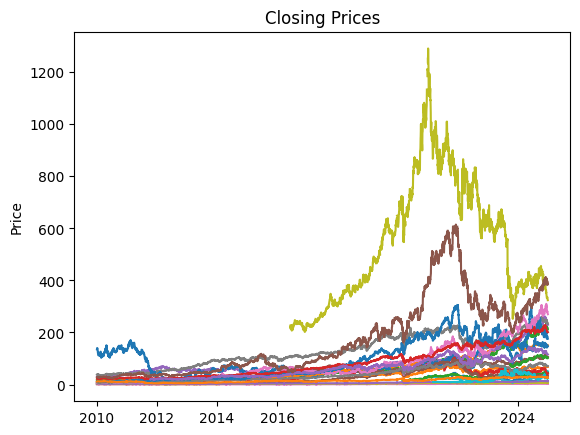

In [ ]:
# Plot closing prices
plt.plot(df['Close'])
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

Number of rows in dataframe without missing values: 295
Number of rows total: 3877
Number of rows in dataframe without missing values after dropping bad columns: 2027
Number of rows total after dropping bad columns: 3877


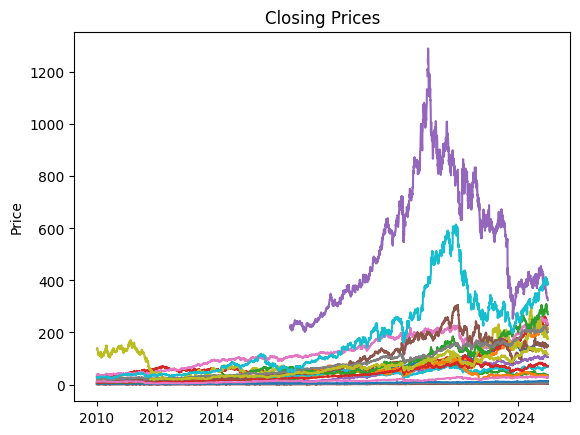

In [ ]:
# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values: {df.dropna().shape[0]}")
print(f"Number of rows total: {df.shape[0]}")

# Drop columns with more than 50% NaN values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values after dropping bad columns: {df.dropna().shape[0]}")
print(f"Number of rows total after dropping bad columns: {df.shape[0]}")

# Plot closing prices
plt.plot(df['Close'])
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

Number of rows in dataframe without missing values: 2027
Number of rows total: 3877


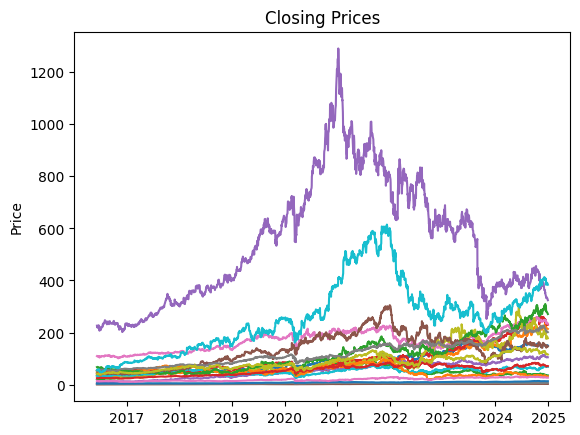

In [ ]:
# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values: {df.dropna().shape[0]}")
print(f"Number of rows total: {df.shape[0]}")

df = df.dropna()

# Plot closing prices
plt.plot(df['Close'])
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()


# Normalising

In [ ]:
df_normalized_closed = df['Close'] - df['Close'].iloc[0]
df_normalized_closed

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06-10,-0.082031,-0.824173,-0.378048,-0.809998,-0.120000,-0.008390,-0.489525,-0.083662,-1.940002,-0.400200,-0.112281,-0.887207,-1.110001,-0.030140,-5.266129,-0.227646,-0.345569,0.000000,-0.341736,-0.239998
2016-06-14,-0.328133,-2.265274,-1.306837,-1.349998,-0.080000,-0.033564,-1.305389,-0.162543,-2.560001,-1.663979,-0.280704,-2.322788,-1.620003,0.200914,-7.548111,-2.276413,-0.856877,0.306522,-0.584553,-1.009998
2016-06-15,0.000000,-2.472473,-1.166822,-1.489998,-0.060000,-0.033564,-1.985321,-0.126689,-2.250000,-1.326973,-0.246471,-2.260368,-1.590004,-0.028133,-3.949600,-1.252037,-0.825141,0.153259,-0.638512,-0.340000
2016-06-16,-0.041012,-2.412594,-1.283503,-2.199997,0.050000,-0.041954,-1.332611,-0.114737,-2.060001,-2.232679,-0.251265,-3.308079,-2.080002,0.174795,-6.319336,-2.845520,-0.846298,0.672623,-0.836357,0.360001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,111.626247,182.857899,15.124949,180.250008,97.799999,1.969530,125.421822,4.133416,125.430004,33.709454,8.818749,-14.356815,215.320007,44.290348,105.657990,98.634354,12.386472,151.454662,74.432178,329.109997
2024-12-20,112.126247,182.119099,14.825670,177.180000,98.380001,1.979420,128.174690,4.138266,131.939999,33.809452,8.888750,-14.176815,213.040009,46.174824,106.157990,107.434357,12.356471,151.753551,75.139980,336.780010
2024-12-23,115.126247,181.270481,15.204756,175.260002,97.219997,2.009092,128.972633,4.131476,135.910000,34.359455,8.918749,-13.896816,211.600006,46.988125,108.257996,104.734360,12.286471,149.731060,75.508839,334.389996


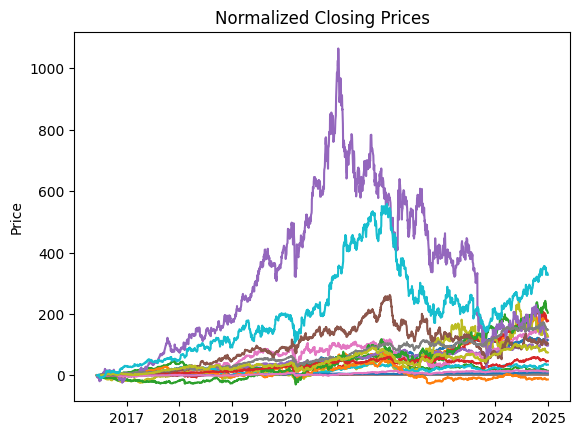

In [ ]:
# Plot normalized closing prices
plt.plot(df_normalized_closed)
# plt.legend(df.columns)
plt.title('Normalized Closing Prices')
plt.ylabel('Price')
plt.show()

This plot shows why we cannot weight stocks equally. Some stocks are more volatile than others.

In [ ]:
# Add a new column to the DataFrame with daily differences
df_diff = df['Close'].diff()
# Drop the first row (NaN)
df_diff = df_diff.dropna()
df_diff

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-10,-0.082031,-0.824173,-0.378048,-0.809998,-0.120000,-0.008390,-0.489525,-0.083662,-1.940002,-0.400200,-0.112281,-0.887207,-1.110001,-0.030140,-5.266129,-0.227646,-0.345569,0.000000,-0.341736,-0.239998
2016-06-14,-0.246101,-1.441101,-0.928789,-0.540001,0.040000,-0.025173,-0.815865,-0.078881,-0.619999,-1.263779,-0.168422,-1.435581,-0.510002,0.231054,-2.281982,-2.048767,-0.511309,0.306522,-0.242817,-0.770000
2016-06-15,0.328133,-0.207199,0.140015,-0.139999,0.020000,0.000000,-0.679932,0.035855,0.310001,0.337006,0.034233,0.062420,0.029999,-0.229048,3.598511,1.024376,0.031736,-0.153263,-0.053959,0.669998
2016-06-16,-0.041012,0.059879,-0.116680,-0.709999,0.110000,-0.008390,0.652710,0.011952,0.189999,-0.905706,-0.004794,-1.047710,-0.489998,0.202929,-2.369736,-1.593483,-0.021157,0.519363,-0.197845,0.700001
2016-06-17,-0.328136,-0.193394,0.051342,0.199997,-0.130000,0.004195,-0.336395,0.053783,0.130001,0.695070,0.067781,0.454754,-0.699997,0.050232,5.002777,0.455284,0.017631,-0.647076,0.143875,0.310001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.500000,-0.988373,0.458893,-1.449997,-0.559998,-0.059344,-2.124512,-0.111545,-8.389999,-1.349998,-0.185000,-0.910000,0.910004,-0.743874,-6.500000,-6.600006,-0.190001,0.099640,-0.488480,1.899994
2024-12-20,0.500000,-0.738800,-0.299278,-3.070007,0.580002,0.009891,2.752869,0.004850,6.509995,0.099998,0.070001,0.180000,-2.279999,1.884476,0.500000,8.800003,-0.030001,0.298889,0.707802,7.670013
2024-12-23,3.000000,-0.848618,0.379086,-1.919998,-1.160004,0.029672,0.797943,-0.006790,3.970001,0.550003,0.030000,0.279999,-1.440002,0.813301,2.100006,-2.699997,-0.070000,-2.022491,0.368858,-2.390015


In [ ]:
# Add a new column to the DataFrame with daily difference relative to the previous day
df_diff_relative = df['Close'].pct_change()
# Drop the first row (NaN)
df_diff_relative = df_diff_relative.dropna()
df_diff_relative


Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-10,-0.002326,-0.023384,-0.018125,-0.015183,-0.015810,-0.012499,-0.004471,-0.033964,-0.038454,-0.011809,-0.026983,-0.019552,-0.016513,-0.001210,-0.023256,-0.005249,-0.023926,0.000000,-0.008207,-0.004266
2016-06-14,-0.006993,-0.041867,-0.045351,-0.010278,0.005355,-0.037976,-0.007484,-0.033149,-0.012781,-0.037736,-0.041596,-0.032268,-0.007714,0.009287,-0.010318,-0.047493,-0.036268,0.005749,-0.005880,-0.013745
2016-06-15,0.009390,-0.006283,0.007161,-0.002692,0.002663,0.000000,-0.006284,0.015584,0.006473,0.010457,0.008822,0.001450,0.000457,-0.009122,0.016440,0.024931,0.002336,-0.002858,-0.001314,0.012127
2016-06-16,-0.001163,0.001827,-0.005925,-0.013691,0.014608,-0.013157,0.006071,0.005115,0.003942,-0.027813,-0.001225,-0.024300,-0.007466,0.008156,-0.010651,-0.037838,-0.001554,0.009713,-0.004826,0.012518
2016-06-17,-0.009313,-0.005890,0.002623,0.003910,-0.017016,0.006666,-0.003110,0.022901,0.002687,0.021956,0.017335,0.010810,-0.010746,0.002003,0.022727,0.011236,0.001297,-0.011985,0.003526,0.005475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.003392,-0.004511,0.012918,-0.006169,-0.005285,-0.021978,-0.008962,-0.016628,-0.045531,-0.019579,-0.014052,-0.028500,0.003231,-0.010635,-0.019197,-0.044415,-0.007032,0.000487,-0.004191,0.004955
2024-12-20,0.003404,-0.003387,-0.008317,-0.013142,0.005503,0.003745,0.011718,0.000735,0.037014,0.001479,0.005393,0.005803,-0.008070,0.027232,0.001506,0.061972,-0.001118,0.001460,0.006098,0.019903
2024-12-23,0.020353,-0.003904,0.010623,-0.008329,-0.010947,0.011194,0.003357,-0.001029,0.021767,0.008124,0.002299,0.008974,-0.005138,0.011441,0.006314,-0.017904,-0.002612,-0.009862,0.003159,-0.006081


# Rolling 60-day Volatility

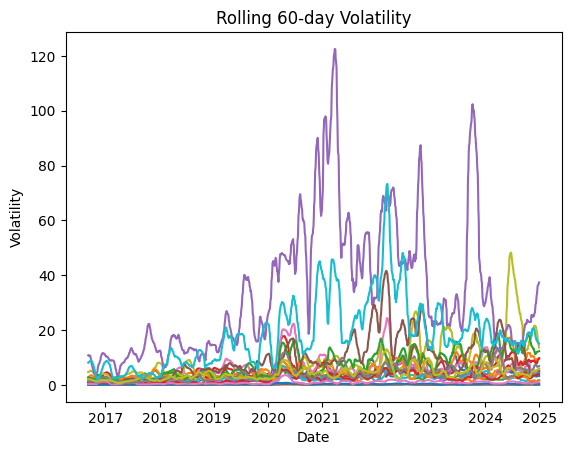

In [ ]:
df_volatility = df['Close'].rolling(window=60).std()
df_volatility

# Plot volatility
plt.plot(df_volatility)
plt.title('Rolling 60-day Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

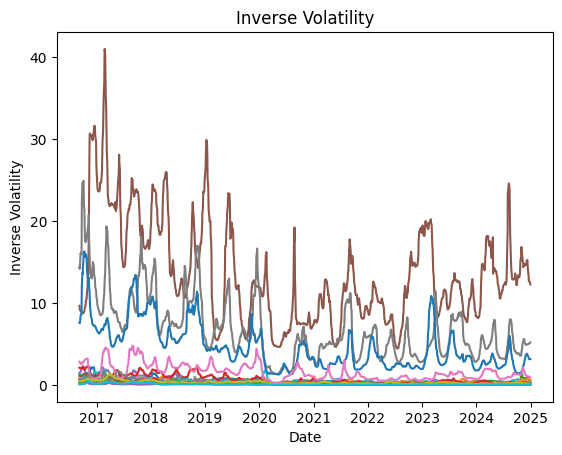

In [ ]:
df_inverse_volatility = 1 / df_volatility
df_inverse_volatility

# Plot inverse volatility
plt.plot(df_inverse_volatility)
plt.title('Inverse Volatility')
plt.ylabel('Inverse Volatility')
plt.xlabel('Date')
plt.show()

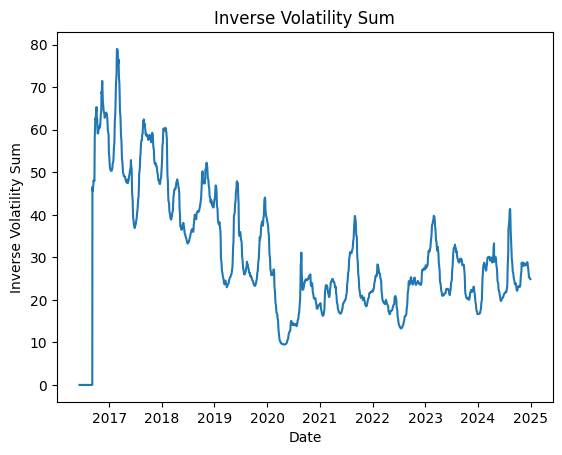

In [ ]:
df_inverse_volatility_sum = df_inverse_volatility.sum(axis=1)
df_inverse_volatility_sum

# Plot inverse volatility sum
plt.plot(df_inverse_volatility_sum)
plt.title('Inverse Volatility Sum')
plt.ylabel('Inverse Volatility Sum')
plt.xlabel('Date')
plt.show()

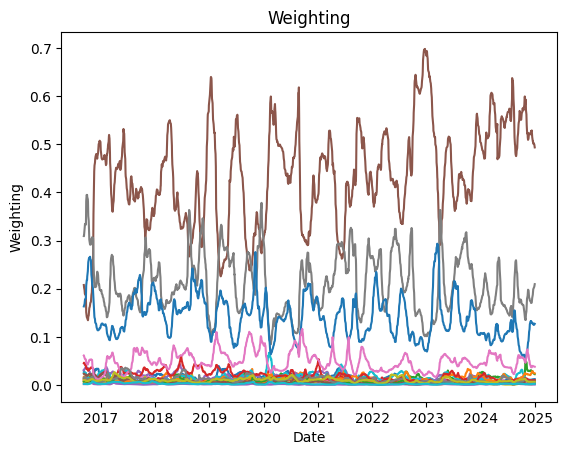

In [ ]:
df_weighting = df_inverse_volatility.div(df_inverse_volatility_sum, axis=0)
df_weighting
# Plot weighting
plt.plot(df_weighting)
plt.title('Weighting')
plt.ylabel('Weighting')
plt.xlabel('Date')
plt.show()


In [ ]:
df_weighting

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,0.012057,0.004104,0.025431,0.004534,0.007840,0.502981,0.007337,0.195302,0.002161,0.008083,0.127468,0.026699,0.003202,0.009765,0.001097,0.007340,0.039390,0.005795,0.006941,0.002473
2024-12-20,0.012084,0.004168,0.024653,0.004434,0.008095,0.501229,0.007250,0.198930,0.002341,0.008160,0.126600,0.025742,0.003245,0.009807,0.001095,0.007586,0.039228,0.005907,0.006920,0.002526
2024-12-23,0.012144,0.004178,0.023927,0.004300,0.008259,0.502164,0.007109,0.201302,0.002556,0.008117,0.124869,0.025215,0.003250,0.009856,0.001089,0.007625,0.038729,0.005897,0.006854,0.002560


In [ ]:
# Drop rows before 2023-01-01
df_weighting = df_weighting.loc['2023-01-01':]
df_weighting

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.007869,0.004733,0.013304,0.011256,0.010019,0.686347,0.007213,0.103938,0.002322,0.011577,0.071298,0.012453,0.005962,0.008116,0.001479,0.002922,0.023026,0.009089,0.004277,0.002798
2023-01-04,0.007379,0.004728,0.012978,0.010902,0.009902,0.693351,0.007019,0.101365,0.002288,0.011497,0.069560,0.012022,0.006319,0.007887,0.001423,0.002844,0.022651,0.008832,0.004255,0.002800
2023-01-05,0.007302,0.004913,0.013188,0.010631,0.010309,0.690746,0.007033,0.101928,0.002316,0.011852,0.070109,0.011753,0.006573,0.007923,0.001448,0.002836,0.023151,0.008787,0.004394,0.002809
2023-01-06,0.007082,0.005184,0.013451,0.010748,0.011034,0.685163,0.007150,0.102599,0.002364,0.012347,0.071854,0.011620,0.006874,0.008037,0.001499,0.002882,0.023716,0.008995,0.004600,0.002800
2023-01-09,0.006914,0.005510,0.013534,0.010872,0.011659,0.678157,0.007213,0.104215,0.002402,0.012821,0.074410,0.011304,0.007061,0.008147,0.001567,0.002939,0.024561,0.009135,0.004817,0.002763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,0.012057,0.004104,0.025431,0.004534,0.007840,0.502981,0.007337,0.195302,0.002161,0.008083,0.127468,0.026699,0.003202,0.009765,0.001097,0.007340,0.039390,0.005795,0.006941,0.002473
2024-12-20,0.012084,0.004168,0.024653,0.004434,0.008095,0.501229,0.007250,0.198930,0.002341,0.008160,0.126600,0.025742,0.003245,0.009807,0.001095,0.007586,0.039228,0.005907,0.006920,0.002526
2024-12-23,0.012144,0.004178,0.023927,0.004300,0.008259,0.502164,0.007109,0.201302,0.002556,0.008117,0.124869,0.025215,0.003250,0.009856,0.001089,0.007625,0.038729,0.005897,0.006854,0.002560


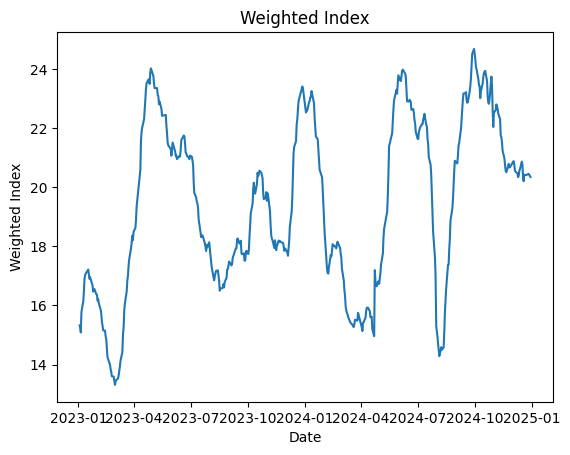

In [ ]:
# Create a index with help of the closing prices and the weighting
df_weighted_index = (df.loc['2023-01-01':]['Close'] * df_weighting).sum(axis=1)
df_weighted_index

# Plot weighted index
plt.plot(df_weighted_index)
plt.title('Weighted Index')
plt.ylabel('Weighted Index')
plt.xlabel('Date')
plt.show()

[*********************100%***********************]  1 of 1 completed


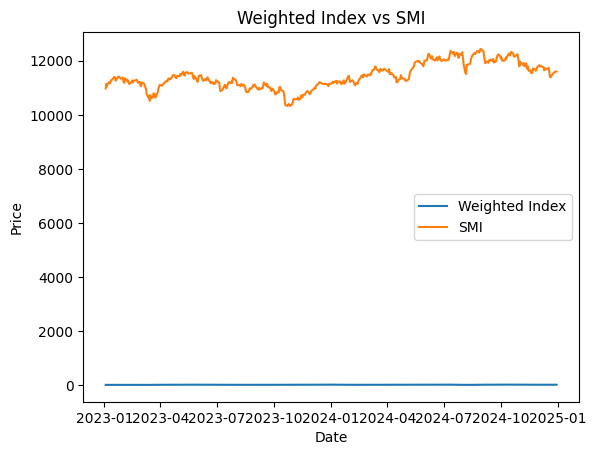

In [ ]:
# Compare the weighted index with SMI
smi = yf.download('^SSMI', start='2023-01-01', end='2025-01-01', interval='1d')['Close']
smi = smi.reindex(df_weighted_index.index, method='ffill')
smi = smi.dropna()

# Plot weighted index and SMI
plt.plot(df_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.title('Weighted Index vs SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()



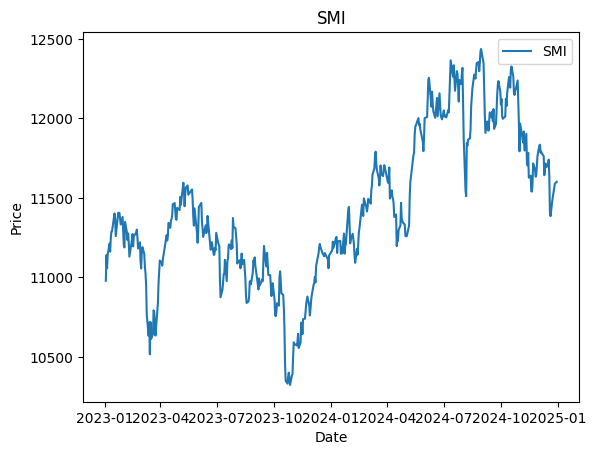

In [ ]:
# Plot SMI 
plt.plot(smi, label='SMI')
plt.title('SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
smi = (smi / smi.iloc[0])  # Normalize to start at 0
df_weighted_index = (df_weighted_index / df_weighted_index.iloc[0])  # Normalize to start at 0
df_weighted_index

Date
2023-01-03    1.000000
2023-01-04    0.995696
2023-01-05    0.984410
2023-01-06    1.029045
2023-01-09    1.053316
                ...   
2024-12-19    1.318482
2024-12-20    1.332801
2024-12-23    1.332019
2024-12-27    1.334780
2024-12-30    1.327824
Length: 471, dtype: float64

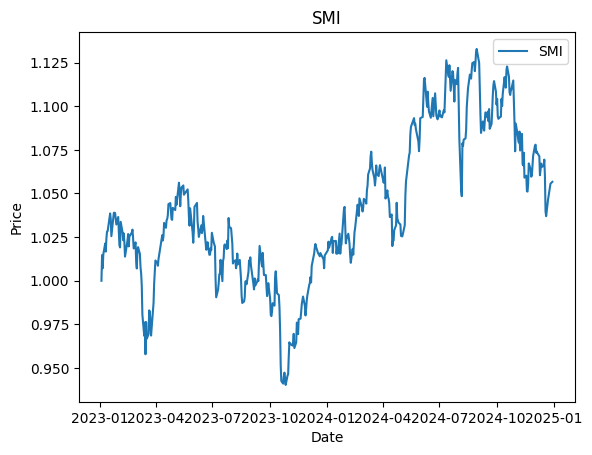

In [ ]:
# Plot weighted index and S&P 500  
plt.plot(smi, label='SMI')
plt.title('SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

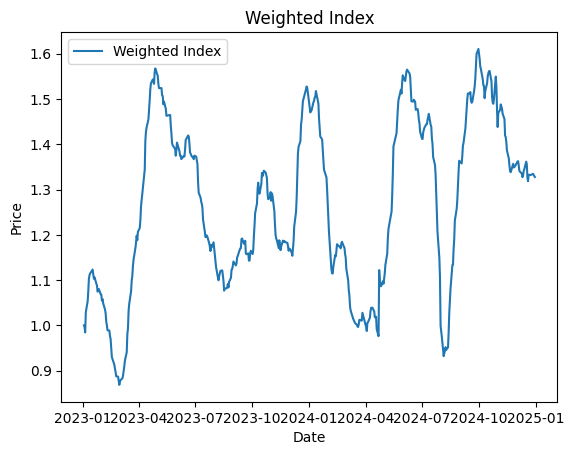

In [ ]:
# Plot weighted index and S&P 500  
plt.plot(df_weighted_index, label='Weighted Index')
plt.title('Weighted Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

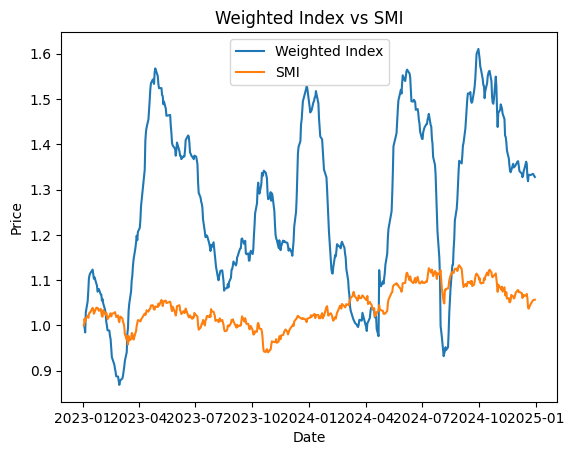

In [ ]:
# Plot weighted index and S&P 500  
plt.plot(df_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.title('Weighted Index vs SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Fixed weighting

In [ ]:
# Split data into training and test sets
train_size = int(len(df) * 0.8)
df_train, df_test = df[:train_size], df_weighted_index[train_size:]
df_train


Price           Close                                                        \
Ticker         BKW.SW        BMI       CGNX        CLH       CWST    CWY.AX   
Date                                                                          
2016-06-09  35.273746  35.245083  20.858110  53.349998   7.590000  0.671267   
2016-06-10  35.191715  34.420910  20.480062  52.540001   7.470000  0.662877   
2016-06-14  34.945614  32.979809  19.551273  52.000000   7.510000  0.637703   
2016-06-15  35.273746  32.772610  19.691288  51.860001   7.530000  0.637703   
2016-06-16  35.232735  32.832489  19.574608  51.150002   7.640000  0.629313   
...               ...        ...        ...        ...        ...       ...   
2017-12-22  48.136356  44.651627  58.125610  53.799999  21.830000  1.373633   
2017-12-27  48.516052  45.120670  57.693577  53.200001  22.340000  1.329886   
2017-12-28  48.769180  45.261383  57.984734  53.610001  22.639999  1.338636   
2017-12-29  48.895744  44.839249  57.440006  54.200001  23.020000  1.312388   
2018-01-03  48.769180  44.417122  59.834900  53.619999  22.379999  1.299264   

Price                                                   ...      Volume  \
Ticker             ECL   ENEL.MI       FSLR      GF.SW  ...      IBE.MC   
Date                                                    ...               
2016-06-09  109.500374  2.463249  50.450001  33.890545  ...  17042488.0   
2016-06-10  109.010849  2.379587  48.509998  33.490345  ...  21425565.0   
2016-06-14  108.194984  2.300706  47.889999  32.226566  ...  32777049.0   
2016-06-15  107.515053  2.336561  48.200001  32.563572  ...  46547092.0   
2016-06-16  108.167763  2.348512  48.389999  31.657866  ...  34715954.0   
...                ...       ...        ...        ...  ...         ...   
2017-12-22  123.968262  3.425026  68.849998  55.825226  ...  20369264.0   
2017-12-27  124.088547  3.395863  68.839996  56.471348  ...  13774365.0   
2017-12-28  124.486458  3.363459  68.349998  56.471348  ...   7537093.0   
2017-12-29  124.162598  3.324576  67.519997  55.480621  ...  16344603.0   
2018-01-03  125.263763  3.292172  69.800003  58.022045  ...  40678452.0   

Price                                                                        \
Ticker        KGX.DE      MANH         NEE   ORSTED.CO    TOM.OL     VIE.PA   
Date                                                                          
2016-06-09  120315.0  355200.0   5551600.0  24880908.0  131428.0  1447717.0   
2016-06-10  159936.0  523300.0   5889600.0   3397510.0  108014.0  1939807.0   
2016-06-14  241096.0  457800.0   6342400.0   1128944.0  144278.0  2280500.0   
2016-06-15  249783.0  433000.0   7671200.0    630679.0  147768.0  1898997.0   
2016-06-16  194124.0  471800.0   6134800.0   1907245.0  197864.0  1904008.0   
...              ...       ...         ...         ...       ...        ...   
2017-12-22  346896.0  335400.0   4315200.0    444707.0   80168.0  1351730.0   
2017-12-27  215645.0  313200.0   4305200.0    354083.0  162186.0   786412.0   
2017-12-28  148931.0  874300.0   3426800.0    454412.0  131746.0   908052.0   
2017-12-29   83117.0  700400.0   4746400.0    277235.0  133134.0   960378.0   
2018-01-03  266043.0  404100.0  11008000.0    437981.0  111136.0  2210552.0   

Price                                       
Ticker             WM        XYL      ZBRA  
Date                                        
2016-06-09  1903100.0  1243700.0  530200.0  
2016-06-10  1225400.0  1002000.0  869400.0  
2016-06-14  1574200.0  1322700.0  869700.0  
2016-06-15  1316000.0  1260400.0  475300.0  
2016-06-16  1936500.0  1679000.0  658200.0  
...               ...        ...       ...  
2017-12-22   791400.0   335900.0  138300.0  
2017-12-27   678000.0   517300.0  106100.0  
2017-12-28   745800.0   466300.0  119000.0  
2017-12-29  1133900.0  1046700.0  159500.0  
2018-01-03  2104800.0   778800.0  253000.0  

[376 rows x 140 columns]

In [ ]:
# Calculate the daily difference for the training set
df_train_diff = df_train.diff().dropna()
df_train_diff

Price          Close                                                    \
Ticker        BKW.SW       BMI      CGNX       CLH      CWST    CWY.AX   
Date                                                                     
2016-06-10 -0.082031 -0.824173 -0.378048 -0.809998 -0.120000 -0.008390   
2016-06-14 -0.246101 -1.441101 -0.928789 -0.540001  0.040000 -0.025173   
2016-06-15  0.328133 -0.207199  0.140015 -0.139999  0.020000  0.000000   
2016-06-16 -0.041012  0.059879 -0.116680 -0.709999  0.110000 -0.008390   
2016-06-17 -0.328136 -0.193394  0.051342  0.199997 -0.130000  0.004195   
...              ...       ...       ...       ...       ...       ...   
2017-12-22 -0.126572 -0.375233 -0.046951 -0.240002  0.110001  0.013124   
2017-12-27  0.379696  0.469044 -0.432034 -0.599998  0.510000 -0.043747   
2017-12-28  0.253128  0.140713  0.291157  0.410000  0.299999  0.008749   
2017-12-29  0.126564 -0.422134 -0.544727  0.590000  0.380001 -0.026248   
2018-01-03 -0.126564 -0.422127  2.394894 -0.580002 -0.640001 -0.013124   

Price                                               ...      Volume            \
Ticker           ECL   ENEL.MI      FSLR     GF.SW  ...      IBE.MC    KGX.DE   
Date                                                ...                         
2016-06-10 -0.489525 -0.083662 -1.940002 -0.400200  ...   4383077.0   39621.0   
2016-06-14 -0.815865 -0.078881 -0.619999 -1.263779  ...  11351484.0   81160.0   
2016-06-15 -0.679932  0.035855  0.310001  0.337006  ...  13770043.0    8687.0   
2016-06-16  0.652710  0.011952  0.189999 -0.905706  ... -11831138.0  -55659.0   
2016-06-17 -0.336395  0.053783  0.130001  0.695070  ...  13801985.0   86756.0   
...              ...       ...       ...       ...  ...         ...       ...   
2017-12-22  0.425682 -0.003241 -0.260002 -0.215374  ...  -9446679.0  -97568.0   
2017-12-27  0.120285 -0.029163 -0.010002  0.646122  ...  -6594899.0 -131251.0   
2017-12-28  0.397911 -0.032404 -0.489998  0.000000  ...  -6237272.0  -66714.0   
2017-12-29 -0.323860 -0.038883 -0.830002 -0.990726  ...   8807510.0  -65814.0   
2018-01-03  1.101166 -0.032404  2.280006  2.541424  ...  24333849.0  182926.0   

Price                                                                       \
Ticker          MANH        NEE   ORSTED.CO    TOM.OL     VIE.PA        WM   
Date                                                                         
2016-06-10  168100.0   338000.0 -21483398.0  -23414.0   492090.0 -677700.0   
2016-06-14  -65500.0   452800.0  -2268566.0   36264.0   340693.0  348800.0   
2016-06-15  -24800.0  1328800.0   -498265.0    3490.0  -381503.0 -258200.0   
2016-06-16   38800.0 -1536400.0   1276566.0   50096.0     5011.0  620500.0   
2016-06-17  426900.0  5489600.0    937054.0  198782.0  1146893.0  423100.0   
...              ...        ...         ...       ...        ...       ...   
2017-12-22  -82200.0 -2833600.0    170232.0   17840.0 -1140424.0 -935000.0   
2017-12-27  -22200.0   -10000.0    -90624.0   82018.0  -565318.0 -113400.0   
2017-12-28  561100.0  -878400.0    100329.0  -30440.0   121640.0   67800.0   
2017-12-29 -173900.0  1319600.0   -177177.0    1388.0    52326.0  388100.0   
2018-01-03 -296300.0  6261600.0    160746.0  -21998.0  1250174.0  970900.0   

Price                           
Ticker           XYL      ZBRA  
Date                            
2016-06-10 -241700.0  339200.0  
2016-06-14  320700.0     300.0  
2016-06-15  -62300.0 -394400.0  
2016-06-16  418600.0  182900.0  
2016-06-17   55300.0 -117300.0  
...              ...       ...  
2017-12-22 -314100.0 -233800.0  
2017-12-27  181400.0  -32200.0  
2017-12-28  -51000.0   12900.0  
2017-12-29  580400.0   40500.0  
2018-01-03 -267900.0   93500.0  

[375 rows x 140 columns]

In [ ]:
# Define a new dataframe to store the volatility and inverse volatility
df_train_mini = pd.DataFrame()

# Calculate the volatility for each column in the old dataframe
df_train_mini['Volatility'] = df_train_diff.std()

# Calculate the inverse volatility
df_train_mini['Inverse Volatility'] = 1 / df_train_mini['Volatility']

# Calculate the sum of the inverse volatilities
sum_inverse_volatility = df_train_mini['Inverse Volatility'].sum()

# Calculate the volatility weighting for each stock based on the inverse volatility and sum of all inverse volatilities
df_train_mini['Volatility Weighting'] = df_train_mini['Inverse Volatility'] / sum_inverse_volatility

# Calculate the volatility weighting in percentage (multiply by 100 & round to 2 decimal places)
df_train_mini['Volatility Weighting (%)'] = (df_train_mini['Volatility Weighting'] * 100).round(2)

# Print the result
df_train_mini

Volatility  Inverse Volatility  Volatility Weighting  \
Price  Ticker                                                           
Close  BKW.SW  4.270700e-01        2.341536e+00                   0.0   
       BMI     6.104974e-01        1.638009e+00                   0.0   
       CGNX    7.296861e-01        1.370452e+00                   0.0   
       CLH     6.961831e-01        1.436404e+00                   0.0   
       CWST    2.876820e-01        3.476060e+00                   0.0   
...                     ...                 ...                   ...   
Volume TOM.OL  1.669796e+05        5.988755e-06                   0.0   
       VIE.PA  1.160874e+06        8.614200e-07                   0.0   
       WM      8.171328e+05        1.223791e-06                   0.0   
       XYL     5.457467e+05        1.832352e-06                   0.0   
       ZBRA    2.742386e+05        3.646459e-06                   0.0   

               Volatility Weighting (%)  
Price  Ticker                            
Close  BKW.SW                       0.0  
       BMI                          0.0  
       CGNX                         0.0  
       CLH                          0.0  
       CWST                         0.0  
...                                 ...  
Volume TOM.OL                       0.0  
       VIE.PA                       0.0  
       WM                           0.0  
       XYL                          0.0  
       ZBRA                         0.0  

[140 rows x 4 columns]